# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + api_key + "&q=" + 'Atlanta'
print(city_url)

request = requests.get(city_url)

request.json()

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&q=Atlanta


{'coord': {'lon': -84.388, 'lat': 33.749},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 274.43,
  'feels_like': 274.43,
  'temp_min': 272.66,
  'temp_max': 276.62,
  'pressure': 1025,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 0},
 'dt': 1674526916,
 'sys': {'type': 2,
  'id': 2030688,
  'country': 'US',
  'sunrise': 1674477567,
  'sunset': 1674514735},
 'timezone': -18000,
 'id': 4180439,
 'name': 'Atlanta',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + api_key + "&q=" + city
print(city_url)

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&q=grindavik


In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Save config information.
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q={city.replace(' ','+')}"
    
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=rikitea
Processing Record 1 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=busselton
Processing Record 2 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=belushya+guba
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=dumas
Processing Record 4 of Set 1 | dumas
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=tuktoyaktuk
Processing Record 5 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=lebu
Processing Record 6 of Set 1 | lebu
http://api

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=codrington
Processing Record 4 of Set 2 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=ende
Processing Record 5 of Set 2 | ende
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=qaanaaq
Processing Record 6 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=la+carolina
Processing Record 7 of Set 2 | la carolina
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=rayong
Processing Record 8 of Set 2 | rayong
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=esperance
Processing Record 9 of Set 2 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=v

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=husavik
Processing Record 8 of Set 3 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=tikhvin
Processing Record 9 of Set 3 | tikhvin
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=fort+saint+james
Processing Record 10 of Set 3 | fort saint james
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=mabaruma
Processing Record 11 of Set 3 | mabaruma
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=mogadishu
Processing Record 12 of Set 3 | mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=yellowknife
Processing Record 13 of Set 3 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=tsihombe
Processing Record 12 of Set 4 | tsihombe
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=nizhneyansk
Processing Record 13 of Set 4 | nizhneyansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=haines+junction
Processing Record 14 of Set 4 | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=abha
Processing Record 15 of Set 4 | abha
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=sitangkai
Processing Record 16 of Set 4 | sitangkai
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=nantucket
Processing Record 17 of Set 4 | nantucket
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=izvestkovyy
Processing Record 17 of Set 5 | izvestkovyy
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=shaowu
Processing Record 18 of Set 5 | shaowu
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=ixtapa
Processing Record 19 of Set 5 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=norrtalje
Processing Record 20 of Set 5 | norrtalje
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=vila+velha
Processing Record 21 of Set 5 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=jutai
Processing Record 22 of Set 5 | jutai
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metr

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=beidao
Processing Record 21 of Set 6 | beidao
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=santa+cruz+del+sur
Processing Record 22 of Set 6 | santa cruz del sur
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=vostok
Processing Record 23 of Set 6 | vostok
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=port+macquarie
Processing Record 24 of Set 6 | port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=porbandar
Processing Record 25 of Set 6 | porbandar
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=katsuura
Processing Record 26 of Set 6 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c4

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=san+rafael
Processing Record 24 of Set 7 | san rafael
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=lahat
Processing Record 25 of Set 7 | lahat
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=akhmim
Processing Record 26 of Set 7 | akhmim
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=sulangan
Processing Record 27 of Set 7 | sulangan
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=kopavogur
Processing Record 28 of Set 7 | kopavogur
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=balimo
Processing Record 29 of Set 7 | balimo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=sao+miguel+do+araguaia
Processing Record 27 of Set 8 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=olafsvik
Processing Record 28 of Set 8 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=lagoa
Processing Record 29 of Set 8 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=kununurra
Processing Record 30 of Set 8 | kununurra
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=comodoro+rivadavia
Processing Record 31 of Set 8 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=shimoda
Processing Record 32 of Set 8 | shimoda
http://api.openweathermap.org/data/2.5/weather?appid

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=amapa
Processing Record 31 of Set 9 | amapa
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=dungarpur
Processing Record 32 of Set 9 | dungarpur
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=lewisporte
Processing Record 33 of Set 9 | lewisporte
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=lardos
Processing Record 34 of Set 9 | lardos
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=harper
Processing Record 35 of Set 9 | harper
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=nizhniy+odes
Processing Record 36 of Set 9 | nizhniy odes
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=me

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=shasta+lake
Processing Record 34 of Set 10 | shasta lake
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=jiddah
Processing Record 35 of Set 10 | jiddah
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=los+llanos+de+aridane
Processing Record 36 of Set 10 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=baykit
Processing Record 37 of Set 10 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=imeni+poliny+osipenko
Processing Record 38 of Set 10 | imeni poliny osipenko
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=worpswede
Processing Record 39 of Set 10 | worpswede
http://a

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=bratsk
Processing Record 38 of Set 11 | bratsk
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=balta
Processing Record 39 of Set 11 | balta
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=hobyo
Processing Record 40 of Set 11 | hobyo
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=meulaboh
Processing Record 41 of Set 11 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=san+carlos+de+bariloche
Processing Record 42 of Set 11 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=ondangwa
Processing Record 43 of Set 11 | ondangwa
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e

http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=linares
Processing Record 42 of Set 12 | linares
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=kifri
Processing Record 43 of Set 12 | kifri
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=kuliyapitiya
Processing Record 44 of Set 12 | kuliyapitiya
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=mandalgovi
Processing Record 45 of Set 12 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=nanakuli
Processing Record 46 of Set 12 | nanakuli
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e37132381217&units=metric&q=ulaangom
Processing Record 47 of Set 12 | ulaangom
http://api.openweathermap.org/data/2.5/weather?appid=17f680bb78be5c484ec6e3713238121

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count

<bound method DataFrame.count of                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0           rikitea -23.1203 -134.9692     26.21        75           0   
1         busselton -33.6500  115.3333     28.76        41          21   
2             dumas  35.8656 -101.9732      3.08        48         100   
3       tuktoyaktuk  69.4541 -133.0374    -28.00        76          20   
4              lebu -37.6167  -73.6500     16.80        96         100   
..              ...      ...       ...       ...       ...         ...   
561          zanjan  36.6736   48.4787     -7.32        80          39   
562  guerrero negro  27.9769 -114.0611     14.13        43          17   
563    tres arroyos -38.3739  -60.2798     20.54        44           0   
564  saint-augustin  51.2260  -58.6502     -6.46        90         100   
565         kenitra  34.2610   -6.5802      2.42        61           0   

     Wind Speed Country        Date  
0          7.11      PF  1674528414  
1 

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,26.21,75,0,7.11,PF,1674528414
1,busselton,-33.6500,115.3333,28.76,41,21,5.03,AU,1674528414
2,dumas,35.8656,-101.9732,3.08,48,100,3.09,US,1674528415
3,tuktoyaktuk,69.4541,-133.0374,-28.00,76,20,4.12,CA,1674528291
4,lebu,-37.6167,-73.6500,16.80,96,100,3.93,CL,1674528471


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.21,75,0,7.11,PF,1674528414
1,busselton,-33.6500,115.3333,28.76,41,21,5.03,AU,1674528414
2,dumas,35.8656,-101.9732,3.08,48,100,3.09,US,1674528415
3,tuktoyaktuk,69.4541,-133.0374,-28.00,76,20,4.12,CA,1674528291
4,lebu,-37.6167,-73.6500,16.80,96,100,3.93,CL,1674528471


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

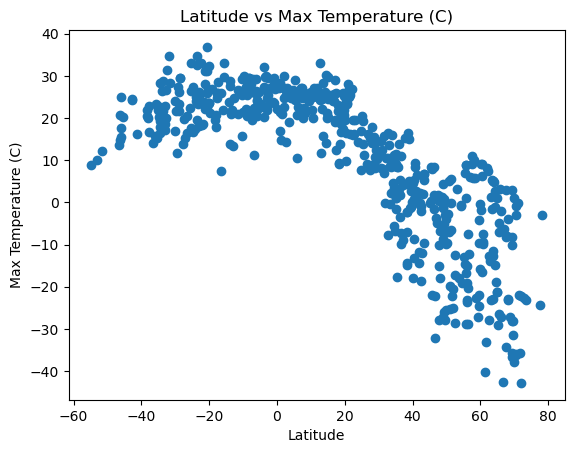

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (C)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

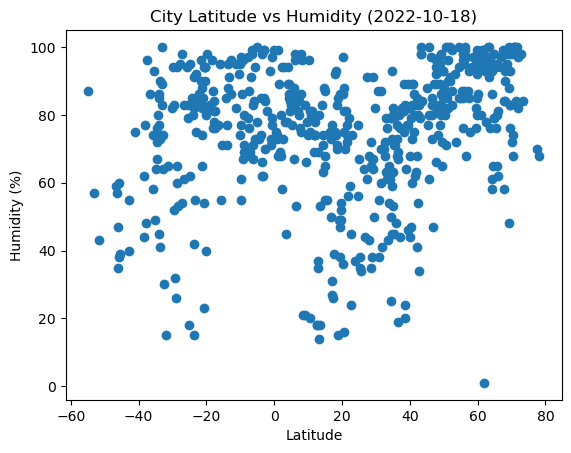

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

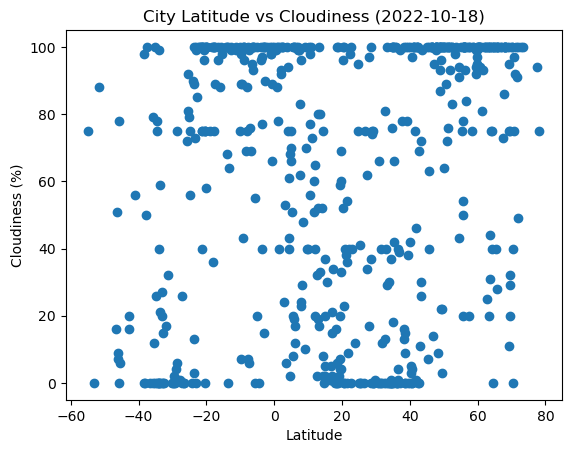

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

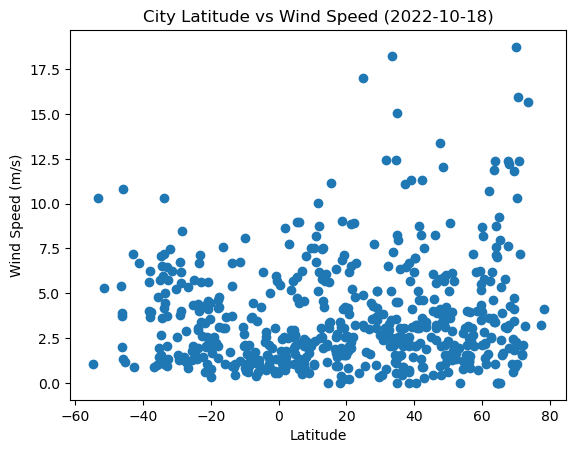

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    print(f"The r-squared is: {rvalue**2}")

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,dumas,35.8656,-101.9732,3.08,48,100,3.09,US,1674528415
3,tuktoyaktuk,69.4541,-133.0374,-28.00,76,20,4.12,CA,1674528291
5,nautla,20.2167,-96.7833,19.66,86,96,2.62,MX,1674528471
6,kobyli,48.9329,16.8916,4.39,93,100,5.89,CZ,1674528417
7,bandarbeyla,9.4942,50.8122,24.02,66,70,7.53,SO,1674528472


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.21,75,0,7.11,PF,1674528414
1,busselton,-33.6500,115.3333,28.76,41,21,5.03,AU,1674528414
4,lebu,-37.6167,-73.6500,16.80,96,100,3.93,CL,1674528471
8,saint-philippe,-21.3585,55.7679,22.77,83,100,4.26,RE,1674528417
11,mataura,-46.1927,168.8643,20.81,35,9,1.99,NZ,1674528419


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6858821999509247


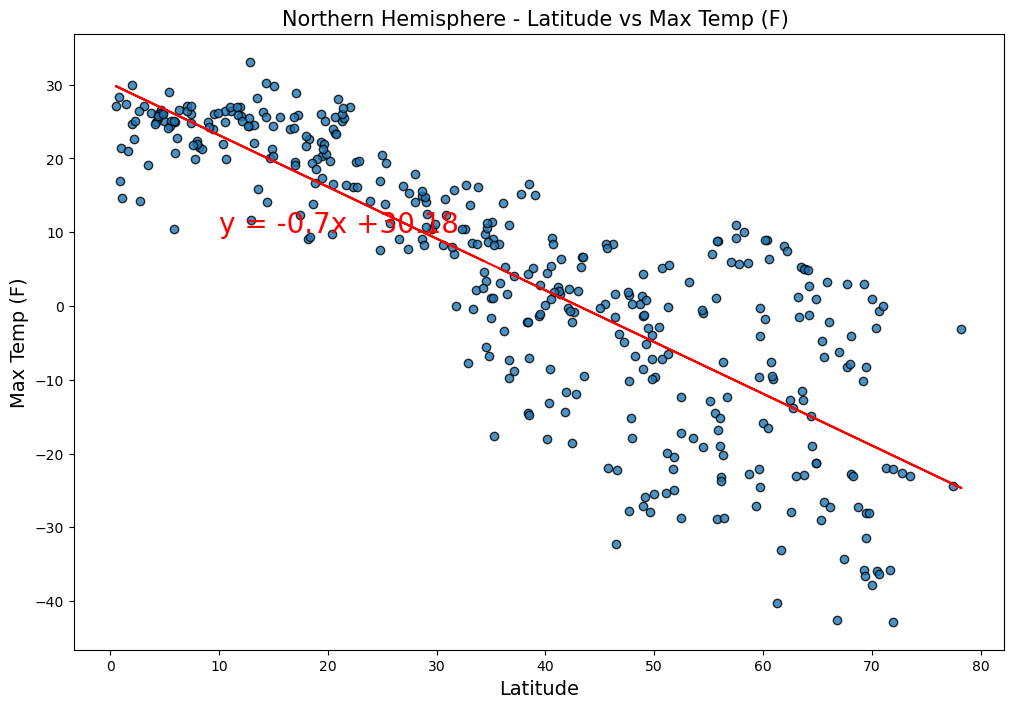

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

plt.show()

The r-squared is: 0.15700553261178712


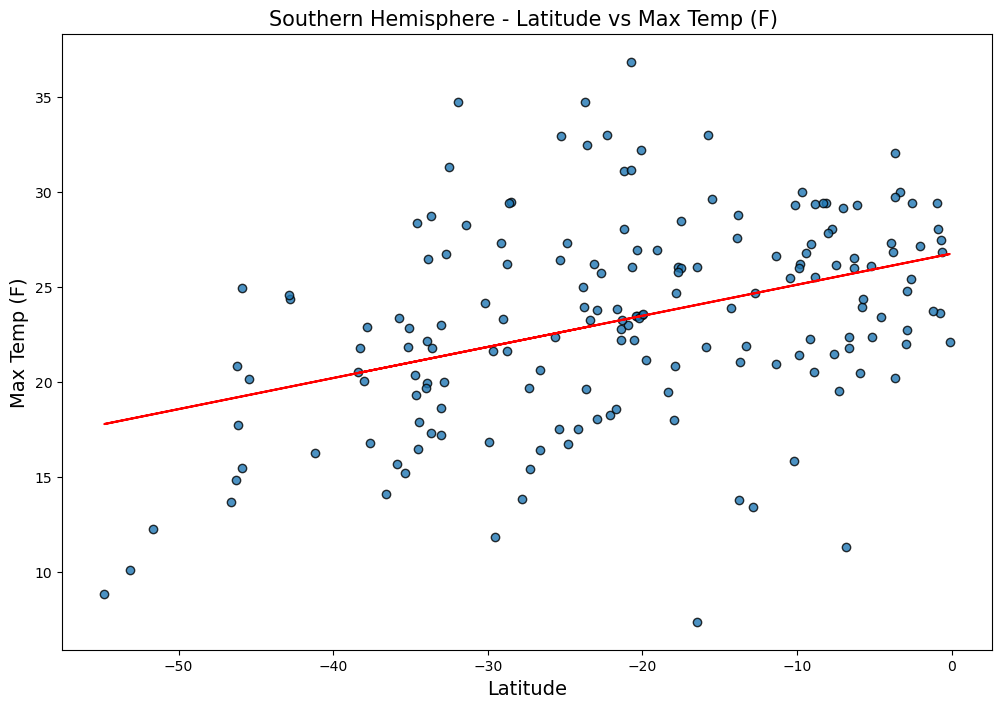

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

plt.show()

**Discussion about the linear relationship:** There is a negative correlation between Latitude and Max Temp in the Northern Hemisphere and a positive correlation between Latitude and Max Temp in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11753207677833219


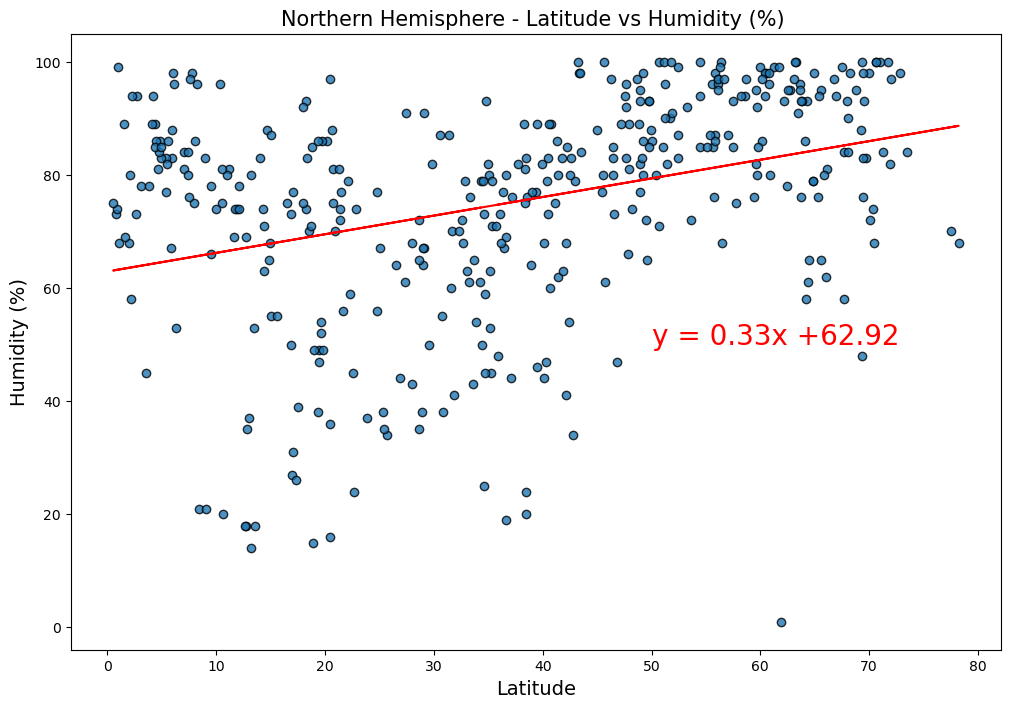

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (50, 50))
plt.show()

The r-squared is: 0.11753207677833219


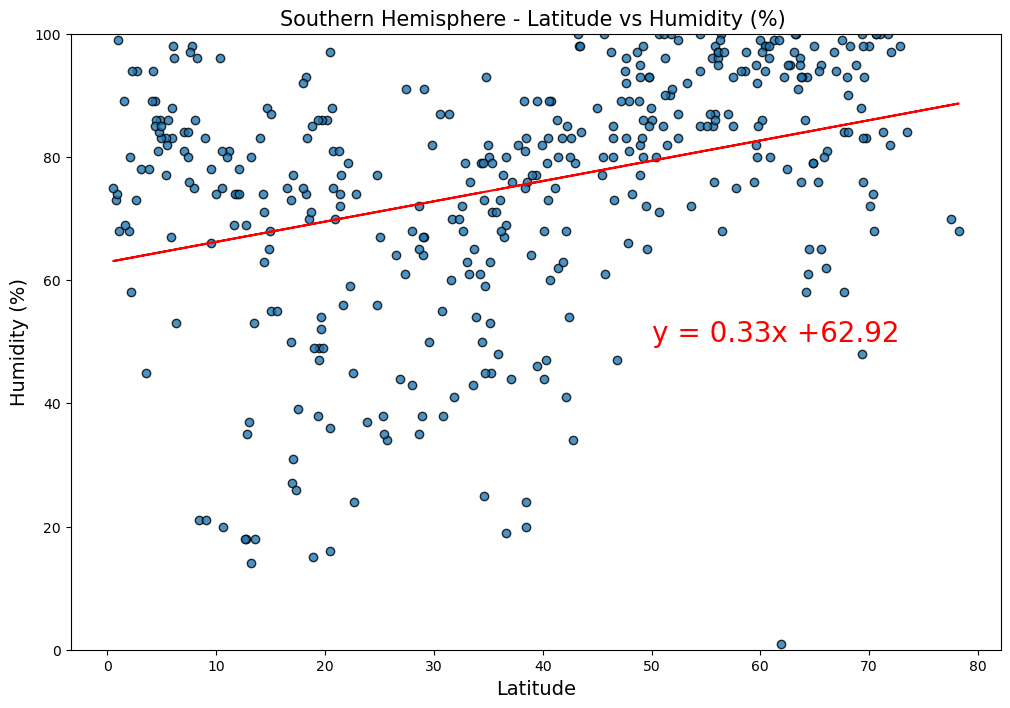

In [42]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (50, 50), 100)
plt.show()

**Discussion about the linear relationship:** There is a positive relationship between Latitude and Humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.10819721260643882


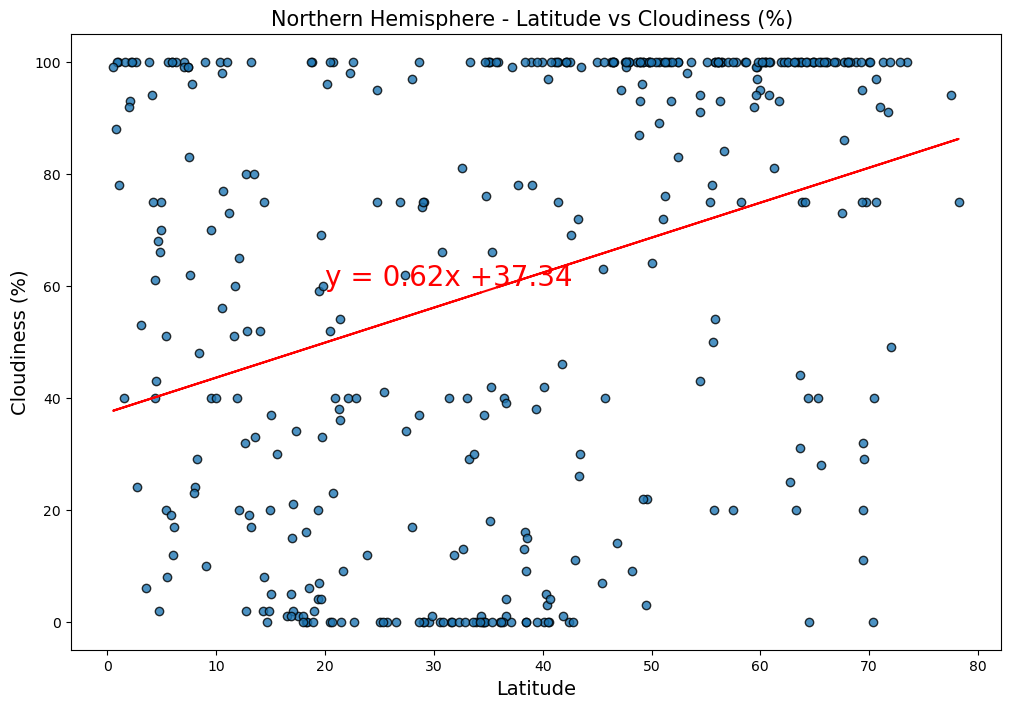

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))


plt.show()

The r-squared is: 0.24672567859057698


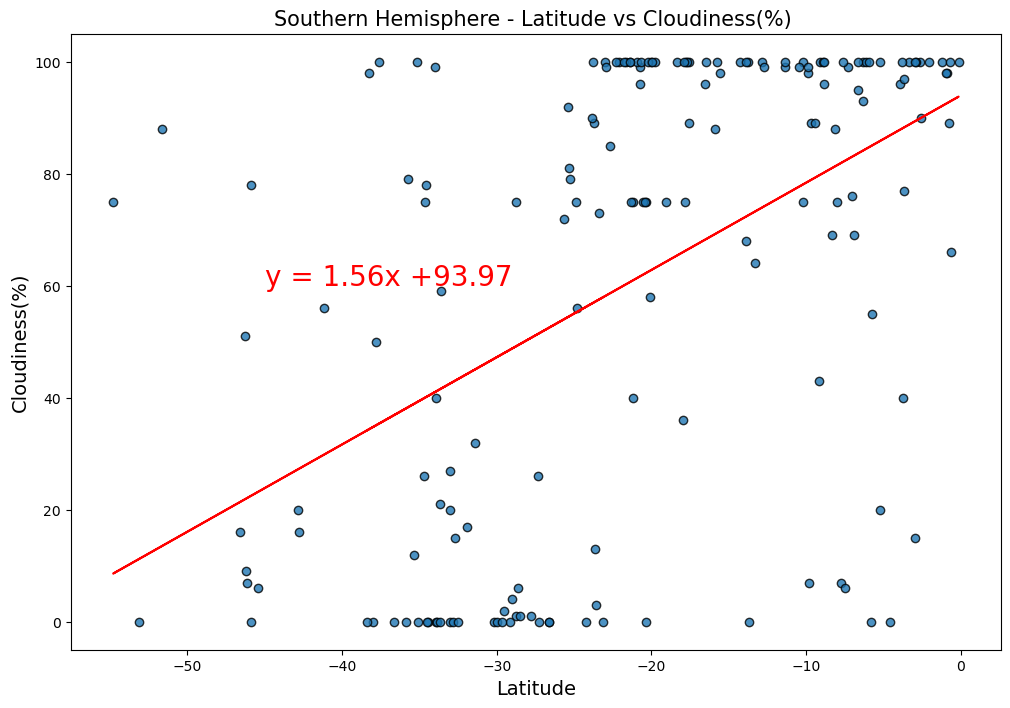

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.show()

**Discussion about the linear relationship:** There is a positive relationship between Latitude and Cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.012774904694224059


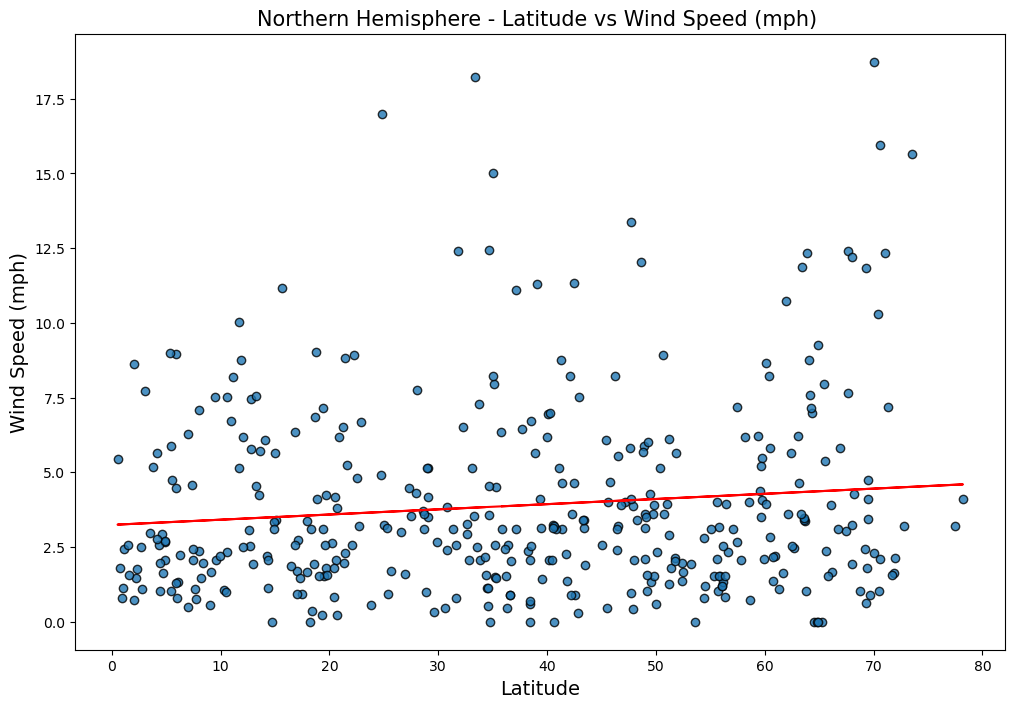

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

plt.show()

The r-squared is: 0.13750879602125513


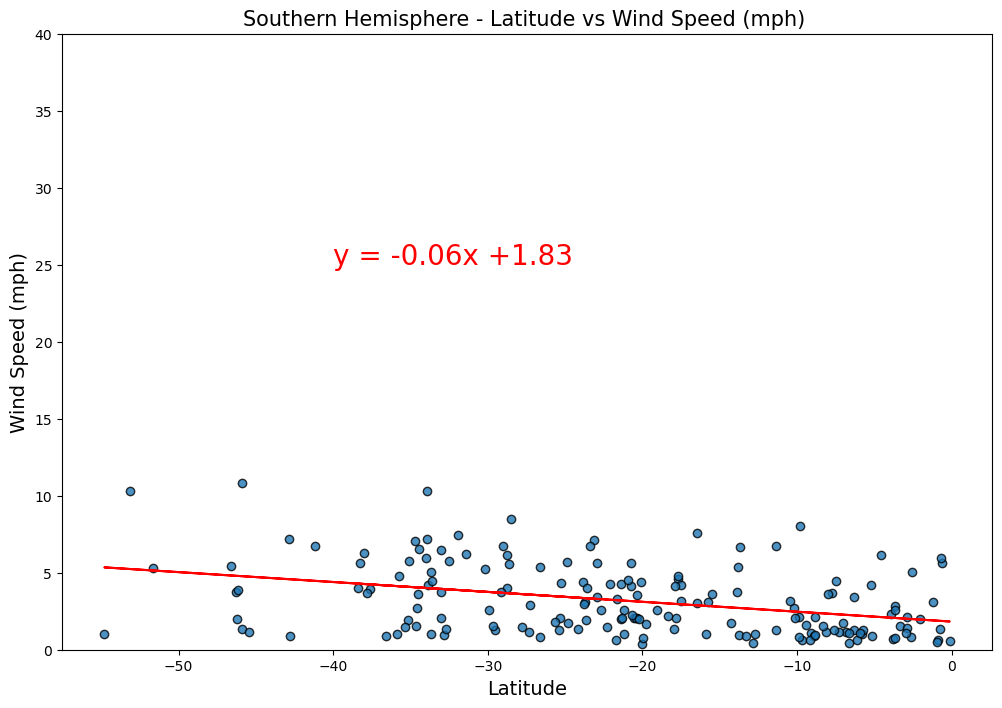

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)

plt.show()

**Discussion about the linear relationship:** There is a small positive correlation between latitude and wind speed int he southern hemisphere but a slight negative correaltion in the southern hemisphere.